

# Project: FBI Guns Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected DB for FBI Guns Data

the DB states the numbers of guns permits foe each type of guns with each sell way for each state per mounth
It used by saler to determine wither the buy has a criminal record.

the questions to be answered:

- Which city has higher number of permits:alaska or new york?
- Which mounth has a higher number of permits: septemper or october?
- Which state has higher permits mean?

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [85]:
df = pd.read_csv('FBI_guns.csv')
df.head()

#first read file then show the header of the file

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-10,Alabama,32038.0,585.0,24084.0,17964.0,1698.0,1104,0.0,28.0,...,0.0,0.0,0.0,28.0,25.0,7.0,1.0,4.0,1.0,80934
1,2020-10,Alaska,264.0,1.0,3209.0,3210.0,348.0,188,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,1.0,1.0,0.0,0.0,7564
2,2020-10,Arizona,8991.0,1015.0,24964.0,12288.0,1951.0,1762,0.0,9.0,...,1.0,0.0,0.0,19.0,13.0,0.0,0.0,1.0,0.0,52521
3,2020-10,Arkansas,5108.0,549.0,8931.0,9386.0,567.0,421,8.0,9.0,...,0.0,0.0,0.0,15.0,7.0,4.0,0.0,0.0,0.0,27177
4,2020-10,California,36719.0,0.0,65376.0,40286.0,8319.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151359


In [86]:
df.shape

#Show how mouny rows and cloumns

(14520, 27)

In [87]:
df.describe()
#Show the statistics of the file

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,14496.000000,3135.000000,14500.000000,14501.000000,7535.000000,14520.000000,14497.000000,12577.000000,12575.000000,7150.000000,...,3850.000000,3025.000000,2860.000000,4785.000000,4785.000000,4785.000000,4510.000000,4785.000000,4290.000000,14520.000000
mean,7177.052635,7008.777671,6853.199931,7889.451348,510.996417,293.465634,53.757881,5.146935,7.583459,0.346014,...,2.539481,0.149752,0.156993,24.767398,19.697388,2.829049,0.867406,0.859979,0.117249,24943.780579
std,26231.395416,45928.824682,10181.349199,9173.106386,1358.058518,778.200562,568.525076,11.367909,15.948442,1.329269,...,20.600661,1.012025,0.975121,90.455469,71.442281,12.019391,4.365298,3.746297,0.429725,42597.579337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1016.000000,2154.000000,27.000000,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4972.750000
50%,763.000000,0.000000,3445.000000,5213.000000,169.000000,133.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13211.000000
75%,5346.000000,50.000000,8303.250000,10629.000000,518.000000,325.000000,0.000000,5.000000,8.000000,0.000000,...,1.000000,0.000000,0.000000,12.000000,13.000000,1.000000,0.000000,0.000000,0.000000,28397.500000
max,522188.000000,626794.000000,147714.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,592.000000,13.000000,12.000000,1299.000000,993.000000,232.000000,70.000000,62.000000,4.000000,714424.000000


In [88]:
df.info()
#elobrate the table information: cloumn title, number of values, data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14520 entries, 0 to 14519
Data columns (total 27 columns):
month                        14520 non-null object
state                        14520 non-null object
permit                       14496 non-null float64
permit_recheck               3135 non-null float64
handgun                      14500 non-null float64
long_gun                     14501 non-null float64
other                        7535 non-null float64
multiple                     14520 non-null int64
admin                        14497 non-null float64
prepawn_handgun              12577 non-null float64
prepawn_long_gun             12575 non-null float64
prepawn_other                7150 non-null float64
redemption_handgun           12580 non-null float64
redemption_long_gun          12579 non-null float64
redemption_other             7150 non-null float64
returned_handgun             4235 non-null float64
returned_long_gun            4180 non-null float64
returned_other   

In [89]:
df.drop(['prepawn_handgun','prepawn_long_gun','prepawn_other','redemption_handgun','redemption_long_gun','redemption_other','returned_handgun','returned_long_gun','returned_other','rentals_handgun','rentals_long_gun','private_sale_handgun','private_sale_long_gun','private_sale_other','return_to_seller_handgun','return_to_seller_long_gun','return_to_seller_other'], axis=1, inplace=True)
# I have removed all the next unuseful clomns using the next method


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [90]:

df.head()
#show the header again

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,totals
0,2020-10,Alabama,32038.0,585.0,24084.0,17964.0,1698.0,1104,0.0,80934
1,2020-10,Alaska,264.0,1.0,3209.0,3210.0,348.0,188,0.0,7564
2,2020-10,Arizona,8991.0,1015.0,24964.0,12288.0,1951.0,1762,0.0,52521
3,2020-10,Arkansas,5108.0,549.0,8931.0,9386.0,567.0,421,8.0,27177
4,2020-10,California,36719.0,0.0,65376.0,40286.0,8319.0,0,0.0,151359


In [91]:
df.info()
#Show the table info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14520 entries, 0 to 14519
Data columns (total 10 columns):
month             14520 non-null object
state             14520 non-null object
permit            14496 non-null float64
permit_recheck    3135 non-null float64
handgun           14500 non-null float64
long_gun          14501 non-null float64
other             7535 non-null float64
multiple          14520 non-null int64
admin             14497 non-null float64
totals            14520 non-null int64
dtypes: float64(6), int64(2), object(2)
memory usage: 1.1+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c2fca14a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4c301ef898>]], dtype=object)

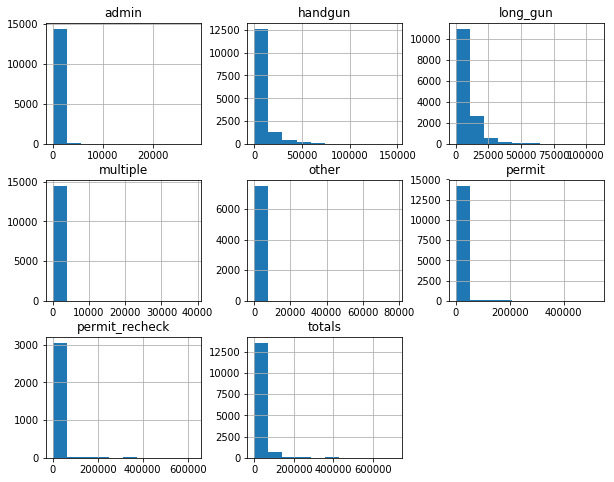

In [92]:
df.hist(figsize=(10, 8))
#show the the histegram with figure size 10,8 for the colmplete table

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c306b5978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4c30b44c88>]], dtype=object)

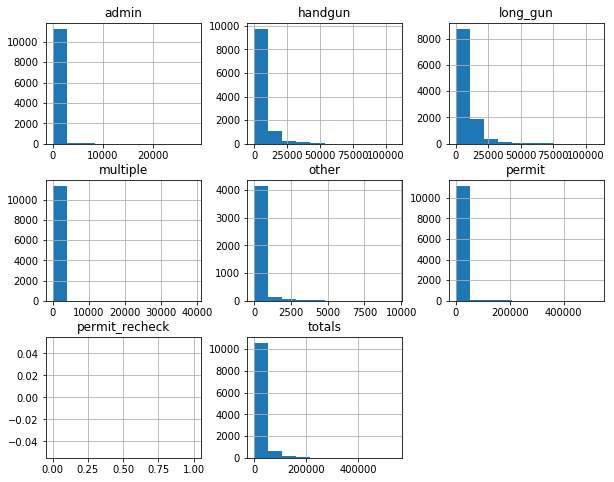

In [93]:
df[df.permit_recheck.isnull()].hist(figsize=(10, 8))
#show the the histegram with figure size 10,8 for each (permit_recheck = null) values only

In [94]:
df.fillna(df.mean(), inplace=True)
#fill all null values with mean

In [95]:
df.info()
#show the table info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14520 entries, 0 to 14519
Data columns (total 10 columns):
month             14520 non-null object
state             14520 non-null object
permit            14520 non-null float64
permit_recheck    14520 non-null float64
handgun           14520 non-null float64
long_gun          14520 non-null float64
other             14520 non-null float64
multiple          14520 non-null int64
admin             14520 non-null float64
totals            14520 non-null int64
dtypes: float64(6), int64(2), object(2)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (- Which city has higher number of permits:alaska or new york?)

In [96]:

alaska = df.state == 'Alaska'
newyork = df.state == 'NewYork'

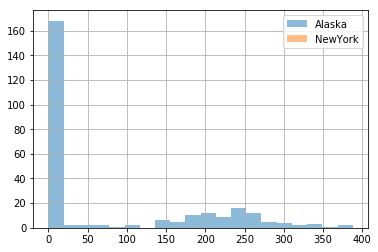

In [97]:
df.permit[alaska].hist(alpha=0.5, bins=20, label='Alaska')
df.permit[newyork].hist(alpha=0.5, bins=20, label='NewYork')

plt.legend()
#Plot shows permits numbers in each state

### Research Question 2  ( Which mounth has a higher number of permits: septemper or october?)

In [98]:

month1 = df.month == '2020-10'
month2 = df.month == '2020-9'

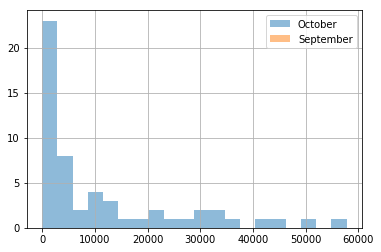

In [99]:
df.permit[month1].hist(alpha=0.5, bins=20, label='October')
df.permit[month2].hist(alpha=0.5, bins=20, label='September')
plt.legend()
#Plot shows permits numbers in each mounth

In [100]:
### Research Question 3  (Which state has higher permits mean?)

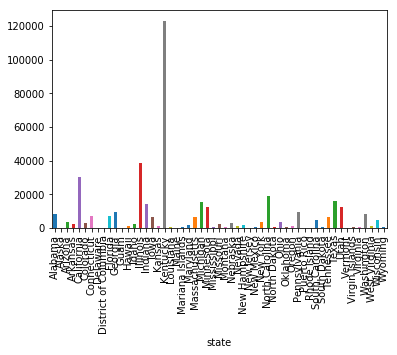

In [101]:
df.groupby(['state']).permit.mean().plot(kind='bar')

#first group the table based on states then plot the mean of permits for each state
#kentucky is the state with highest mean

<a id='conclusions'></a>
## Conclusions

- DB data provided is very helping to campare btw the next varibles: state, month, permits, gun type

- The size of DB is little bit big which make it convenient for making goof judgment

- I was hard to plot alot of data in one chart, using groupby method was very helpfull

- the state with higher permits mean is kentucky

- Guns permition skewed left with mean 7177

- Highest guns regestration in one month was 714424

- People generaly are using hand_gun more than long_gun



In [102]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0